In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns

In [83]:
df = pd.read_csv('ChurnData.csv')
df.describe
df.head(5)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [84]:
logreg = LogisticRegression()
x = df.values[:,0:5]
y = df.values[:,20]


In [85]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ]])

In [86]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [87]:
logreg.fit(x_train,y_train)
y_predict = logreg.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test,y_predict)
proba = logreg.predict_proba(x_test)
cnf_matrix

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[24, 10],
       [22,  4]], dtype=int64)

In [88]:
metrics.accuracy_score(y_test,y_predict)
metrics.precision_score(y_test,y_predict)

0.2857142857142857

Text(0.5, 1.0, 'Confusion Matrix')

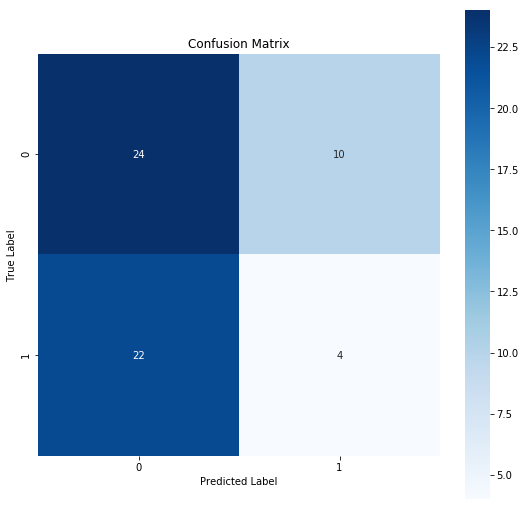

In [92]:
plt.figure(figsize = (9,9))
sns.heatmap(cnf_matrix, annot=True ,square=True, fmt='g', cmap="Blues")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
